# Bay Wheels trip data 2019
## by Taghreed Fayez

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. 
> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Download Data of trips in 2019 from [Bay Wheels trip history data](https://www.lyft.com/bikes/bay-wheels/system-data). 
There are 12 csv files (one for each month).

In [2]:
## Load the 12 files to join them. 
df1 = pd.read_csv('../Data/2019/201901-fordgobike-tripdata.csv')
df2 = pd.read_csv('../Data/2019/201902-fordgobike-tripdata.csv')
df3 = pd.read_csv('../Data/2019/201903-fordgobike-tripdata.csv')

In [3]:
df4 = pd.read_csv('../Data/2019/201904-fordgobike-tripdata.csv')
df5 = pd.read_csv('../Data/2019/201905-baywheels-tripdata.csv')
df6 = pd.read_csv('../Data/2019/201906-baywheels-tripdata.csv')

c:\users\crizma mega store\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df7 = pd.read_csv('../Data/2019/201907-baywheels-tripdata.csv')
df8 = pd.read_csv('../Data/2019/201908-baywheels-tripdata.csv')
df9 = pd.read_csv('../Data/2019/201909-baywheels-tripdata.csv')

c:\users\crizma mega store\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df10 = pd.read_csv('../Data/2019/201910-baywheels-tripdata.csv')
df11 = pd.read_csv('../Data/2019/201911-baywheels-tripdata.csv')
df12 = pd.read_csv('../Data/2019/201912-baywheels-tripdata.csv')

c:\users\crizma mega store\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [7]:
## Check the number of column in each dataframe
i = 1
for d in data:
    print("df{} : {}".format(i,d.shape[1]))
    i += 1

df1 : 14
df2 : 14
df3 : 14
df4 : 14
df5 : 14
df6 : 15
df7 : 15
df8 : 14
df9 : 14
df10 : 14
df11 : 15
df12 : 14


In [8]:
((df6.columns == df7.columns) & (df7.columns == df11.columns)).all()

True

In [9]:
df11.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method'],
      dtype='object')

In [10]:
## Get rid of 'rental_access_method' column
dfs = [df6, df7, df11]
[df.drop(['rental_access_method'], axis=1, inplace=True) for df in dfs]

[None, None, None]

In [11]:
## Check columns name in each datafrmae
for d in data:
    print((df1.columns == d.columns).all())

True
True
True
True
True
True
True
True
True
True
True
False


In [12]:
(df1.columns == df12.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [13]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             150102 non-null  int64  
 1   start_time               150102 non-null  object 
 2   end_time                 150102 non-null  object 
 3   start_station_id         129083 non-null  float64
 4   start_station_name       129087 non-null  object 
 5   start_station_latitude   150102 non-null  float64
 6   start_station_longitude  150102 non-null  float64
 7   end_station_id           128755 non-null  float64
 8   end_station_name         128757 non-null  object 
 9   end_station_latitude     150102 non-null  float64
 10  end_station_longitude    150102 non-null  float64
 11  bike_id                  150102 non-null  int64  
 12  user_type                150102 non-null  object 
 13  rental_access_method     27681 non-null   object 
dtypes: f

In [14]:
df12.rental_access_method.value_counts()

app        23994
clipper     3687
Name: rental_access_method, dtype: int64

In [15]:
df12.drop(['rental_access_method'], axis=1, inplace=True)

In [16]:
for df in data[:-1]:
    df.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

In [17]:
trips = pd.concat(data)
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


In [18]:
trips.shape

(2506983, 13)

In [19]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 267.8+ MB


In [20]:
trips.duplicated().sum()

0

In [21]:
trips.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

In [22]:
trips.nunique()

duration_sec                 15280
start_time                 2502118
end_time                   2502116
start_station_id               436
start_station_name             446
start_station_latitude       74719
start_station_longitude      75943
end_station_id                 436
end_station_name               446
end_station_latitude         76905
end_station_longitude        77995
bike_id                      11070
user_type                        2
dtype: int64

### Cleaning

- *`start_time`* & *`end_time`* to datetime type
-  *`start_station_id`* & *`end_station_id`* to int data type


- extract the month & day from  *`start_time`* column
- new column for duration by minutes


- drop columns *`start_station_latitude`* & *`start_station_longitude`* & *`end_station_latitude`* & *`end_station_longitude`*     

In [23]:
trips.start_station_id.fillna(value = 0, inplace = True)
trips['start_station_id'] = trips.start_station_id.astype(int);

In [24]:
trips.end_station_id.fillna(value = 0, inplace = True)
trips['end_station_id'] = trips.end_station_id.astype(int);

In [25]:
print((trips.start_station_id == 0).sum())
print((trips.end_station_id == 0).sum())

80734
82902


In [26]:
trips.start_station_id.dtype

dtype('int32')

In [27]:
trips['start_time'] = pd.to_datetime(trips.start_time)
trips['end_time'] = pd.to_datetime(trips.end_time)

In [28]:
## trips['month'] = trips['start_time'].dt.month
trips['month'] = trips['start_time'].dt.strftime('%B')

In [29]:
# trips['day_of_week'] = trips['start_time'].dt.day_name
trips['day_of_week'] = trips['start_time'].dt.strftime('%a')

In [30]:
trips['day'] = trips['start_time'].dt.day

In [31]:
trips['duration_min'] = trips['duration_sec'] / 60

In [32]:
trips.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [33]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,month,day_of_week,day,duration_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,196,Grand Ave at Perkins St,4861,Subscriber,January,Thu,31,1347.083333
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,134,Valencia St at 24th St,5506,Subscriber,January,Thu,31,1098.333333
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,157,65th St at Hollis St,2717,Customer,January,Thu,31,1043.883333
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,53,Grove St at Divisadero,4557,Customer,January,Thu,31,744.666667
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,28,The Embarcadero at Bryant St,2100,Customer,January,Thu,31,1011.816667


In [34]:
list(trips.day_of_week.value_counts().index)

['Tue', 'Thu', 'Wed', 'Fri', 'Mon', 'Sat', 'Sun']

In [35]:
## order day of week as CategoricalDtype ordered
## week start from monday
week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = week_order)

trips['day_of_week'] = trips.day_of_week.astype(weekdays)

In [36]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_id    int32         
 4   start_station_name  object        
 5   end_station_id      int32         
 6   end_station_name    object        
 7   bike_id             int64         
 8   user_type           object        
 9   month               object        
 10  day_of_week         category      
 11  day                 int64         
 12  duration_min        float64       
dtypes: category(1), datetime64[ns](2), float64(1), int32(2), int64(3), object(4)
memory usage: 231.9+ MB


In [37]:
trips.to_csv('../Data/2019/2019_trips.csv', index = False)

## Explore

In [38]:
## trips = pd.read_csv('../Data/2019/2019_trips.csv')

In [39]:
trips.shape

(2506983, 13)

In [40]:
trips.duration_sec.describe()

count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

In [41]:
trips.duration_min.describe()

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
25%      5.983333e+00
50%      9.516667e+00
75%      1.478333e+01
max      1.520183e+04
Name: duration_min, dtype: float64

In [42]:
trips.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

### What is the structure of your dataset?

> The Dataset has 2506983 rows and 13 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main numerical feature is  the Duration of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> user type, day of week and month. To answer questions like:
- When are most trips taken in terms of day of the week, or month of the year?
- How long does the average trip take?
- Does the above differ if a user is a subscriber or customer?

## Univariate Exploration

> In this section, investigate the distribution of trip duration columns ('duration_sec', 'duration_min').

In [43]:
base_color = sns.color_palette()[0]

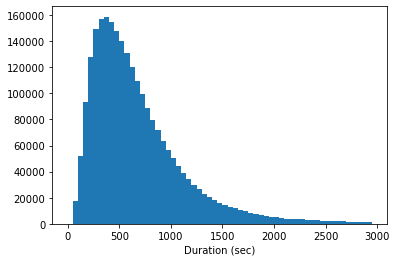

In [44]:
bins = np.arange(0, 3000, 50)
plt.hist(data = trips, x = 'duration_sec', bins = bins);
plt.xlabel('Duration (sec)');

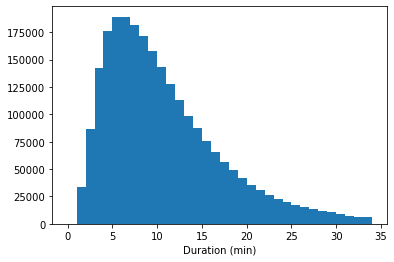

In [45]:
bins = np.arange(0, 35, 1)
plt.hist(data = trips, x = 'duration_min', bins = bins);
plt.xlabel('Duration (min)');

> The distribution of duration is right skewed with some outliers.

In [46]:
np.log10(trips.duration_min.describe())

count    6.399151
mean     1.129071
std      1.517353
min      0.000000
25%      0.776943
50%      0.978485
75%      1.169772
max      4.181896
Name: duration_min, dtype: float64

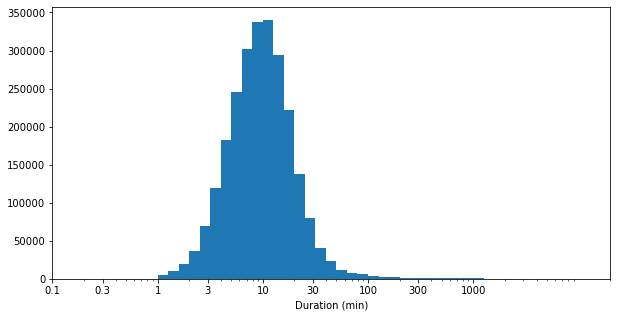

In [47]:
plt.figure(figsize=[10, 5])
bins = 10 ** np.arange(0, 4.2, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

plt.hist(data = trips, x = 'duration_min', bins = bins);

plt.xscale('log');
plt.xlabel('Duration (min)');

plt.xticks(ticks, ticks);

> In log scale the distribution is Unimodal Distribution with mode around 10 minutes, Most trips' duration range between 3 - 30 minutes. 

In [48]:
n_trips = trips.shape[0]
max_prop = trips.user_type.value_counts()[0]/ n_trips
print(max_prop)

0.8062144817096885


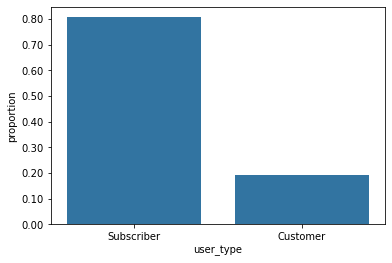

In [49]:
sns.countplot(data = trips, x = 'user_type',
              color = base_color);

tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.yticks(tick_props * n_trips, tick_names)
plt.ylabel('proportion');

> 80% of users are Subscriber.

In [50]:
max_prop = trips.month.value_counts()[0]/ n_trips
print(max_prop)

0.10295323103507284


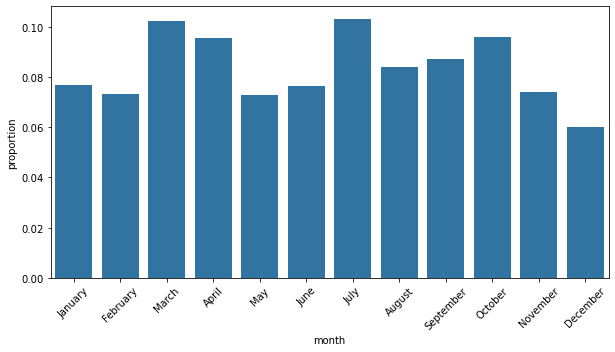

In [51]:
plt.figure(figsize=[10, 5])

sns.countplot(data = trips, x = 'month',
              color = base_color);

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.yticks(tick_props * n_trips, tick_names)
plt.ylabel('proportion');
plt.xticks(rotation = 45);

> July has the maximum number of trips, while December is the least.

In [52]:
max_prop = trips.day_of_week.value_counts()[0]/ n_trips
print(max_prop)

0.17057953723659075


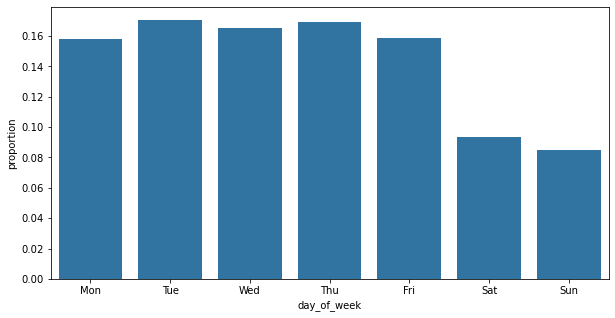

In [53]:
plt.figure(figsize=[10, 5])

sns.countplot(data = trips, x = 'day_of_week',
              color = base_color);

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.yticks(tick_props * n_trips, tick_names)
plt.ylabel('proportion');

> The Weekend days (Sat, Sun) have the least number of trips.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables.

In [54]:
trips.duration_min.quantile([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1])

0.00        1.000000
0.05        3.033333
0.10        3.916667
0.20        5.333333
0.30        6.650000
0.40        8.016667
0.50        9.516667
0.60       11.250000
0.70       13.416667
0.80       16.483333
0.90       22.183333
0.95       29.333333
1.00    15201.833333
Name: duration_min, dtype: float64

In [55]:
most_trips = trips.loc[(trips['duration_min'] <= 30) & (trips['duration_min'] >= 3)]

In [56]:
Outliers = trips.loc[trips['duration_min'] > 30]
Outliers.shape[0]/trips.shape[0]

0.04729110648137622

#### Day of week & Duration of trips.

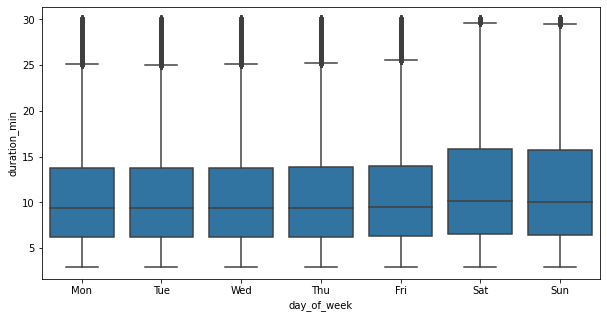

In [57]:
plt.figure(figsize=[10, 5])

sns.boxplot(data = most_trips, x = 'day_of_week', y = 'duration_min',
               color = base_color);

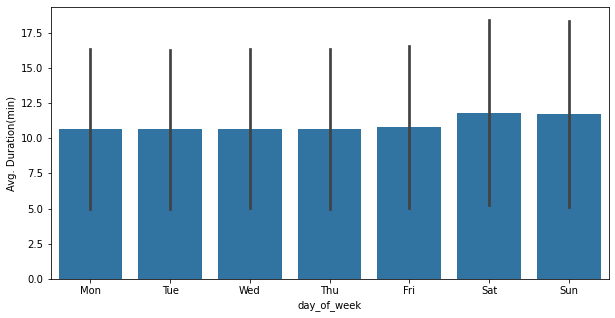

In [58]:
plt.figure(figsize=[10, 5])

sns.barplot(data = most_trips, x = 'day_of_week', y = 'duration_min',
               color = base_color, ci = 'sd');

plt.ylabel('Avg. Duration(min)');

> Even though weekend days have less count of trips, they have a slightly longer duration in average.

#### Month & Duration of trips.

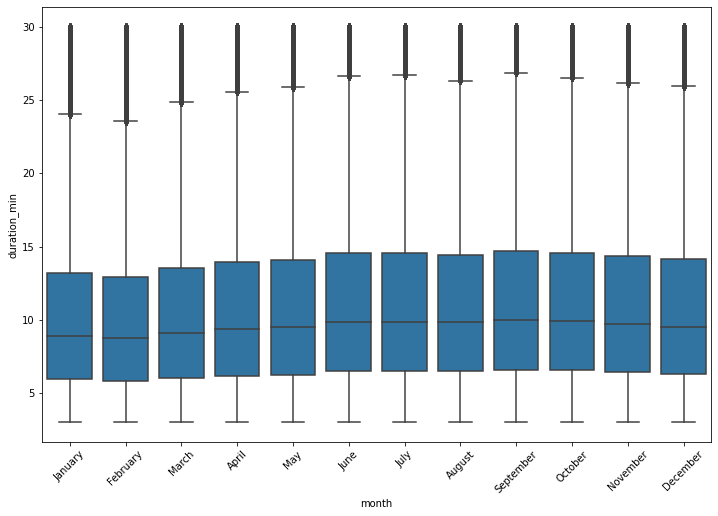

In [59]:
plt.figure(figsize=[12, 8])

sns.boxplot(data = most_trips, x = 'month', y = 'duration_min',
               color = base_color);
plt.xticks(rotation = 45);

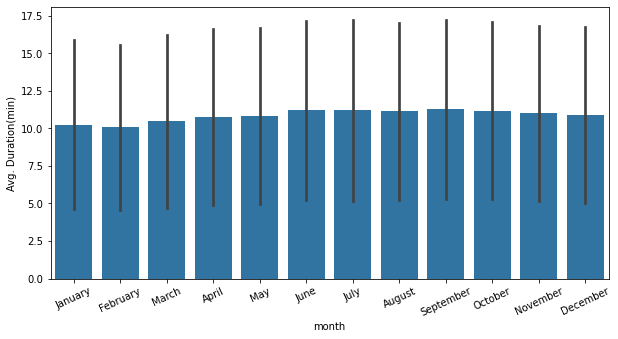

In [60]:
plt.figure(figsize=[10, 5])

sns.barplot(data = most_trips, x = 'month', y = 'duration_min',
               color = base_color, ci = 'sd');

plt.ylabel('Avg. Duration(min)');
plt.xticks(rotation = 25);

In [61]:
most_trips.groupby('month')['duration_min'].mean()

month
April        10.732670
August       11.123166
December     10.890930
February     10.075693
January      10.248435
July         11.197664
June         11.194175
March        10.470416
May          10.840103
November     11.008866
October      11.178470
September    11.270808
Name: duration_min, dtype: float64

> There's no much difference in trips duration based on month, just slightly shorter in first half of the year.

#### Relationships based on user_type

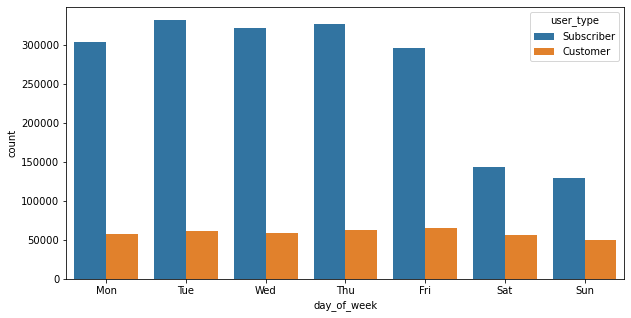

In [62]:
plt.figure(figsize=[10, 5])

sns.countplot(data = most_trips, x = 'day_of_week', hue = 'user_type');

In [63]:
ct_counts = trips.groupby(['day_of_week', 'user_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'day_of_week', columns = 'user_type', values = 'count')
ct_counts

user_type,Customer,Subscriber
day_of_week,,
Mon,66529,329934
Tue,69048,358592
Wed,66455,347993
Thu,70393,354081
Fri,75944,321340
Sat,72705,161665
Sun,64743,147561


In [64]:
n_customer = ct_counts.Customer.sum()
n_subscriber = ct_counts.Subscriber.sum()
(n_customer, n_subscriber)

(485817, 2021166)

In [65]:
ct_counts['Subscriber'] = ct_counts.Subscriber/n_subscriber
ct_counts['Customer'] = ct_counts.Customer/n_customer
ct_counts

user_type,Customer,Subscriber
day_of_week,,
Mon,0.136943,0.163239
Tue,0.142128,0.177418
Wed,0.136790,0.172174
Thu,0.144896,0.175187
Fri,0.156322,0.158987
Sat,0.149655,0.079986
Sun,0.133266,0.073008


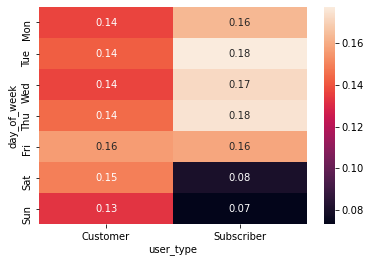

In [66]:
## Proportion of trips count by day for each user_type
sns.heatmap(ct_counts, annot = True, fmt = '0.2f');

> In Weekend (Sat & Sun) the count of trips is the least compared with other weekdays for Subscribers, But there is no much difference for Customers.

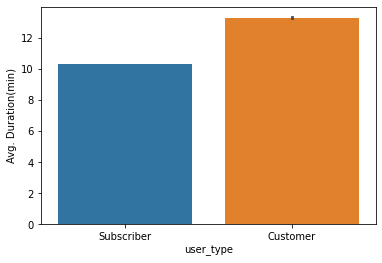

In [67]:
sns.barplot(data = most_trips, x = 'user_type', y = 'duration_min');

plt.ylabel('Avg. Duration(min)');

> Even though 20% of users are customers, They have longer duration of trips in average.

In [68]:
trips.groupby('user_type')['duration_min'].mean()

user_type
Customer      22.577449
Subscriber    11.269486
Name: duration_min, dtype: float64

In [69]:
most_trips.groupby('user_type')['duration_min'].mean()

user_type
Customer      13.313219
Subscriber    10.321552
Name: duration_min, dtype: float64

In [70]:
Outliers.user_type.value_counts()/Outliers.shape[0]

Customer      0.531714
Subscriber    0.468286
Name: user_type, dtype: float64

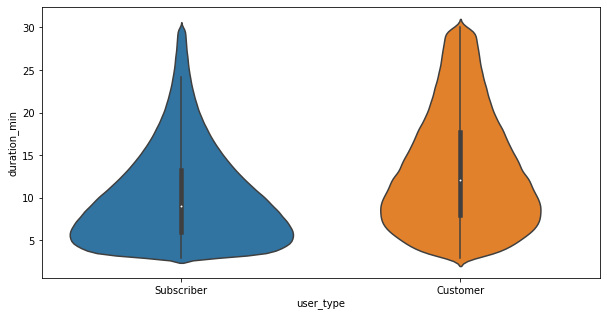

In [71]:
plt.figure(figsize=[10, 5])

sns.violinplot(data = most_trips, x = 'user_type', y = 'duration_min');

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Subscribers use Bay Wheels trip service more than customers, But customers tend to have longer trips in average.

> In Weekend, there are less count of trips which is longer in average.

## Multivariate Exploration

> Create plots of three or more variables to investigate the data even
further.

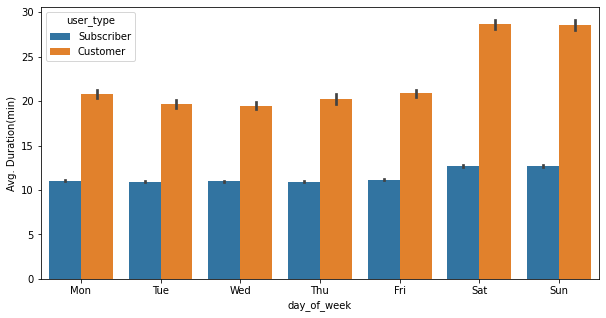

In [72]:
plt.figure(figsize=[10, 5])

sns.barplot(data = trips, x = 'day_of_week', y = 'duration_min', hue = 'user_type');
plt.ylabel('Avg. Duration(min)');

> In Weekend, the trips duration is longer in average for both customer & subscriber.

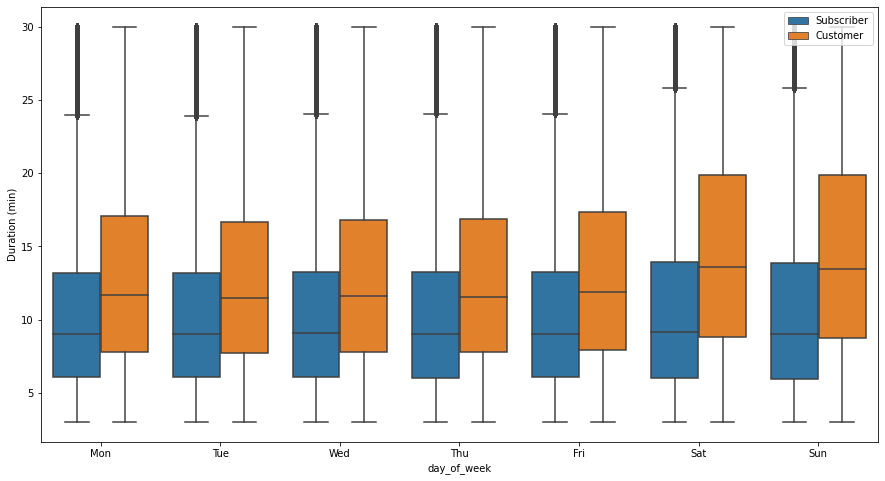

In [73]:
plt.figure(figsize=[15, 8])

sns.boxplot(data = most_trips, x = 'day_of_week', y = 'duration_min', hue = 'user_type');
plt.ylabel('Duration (min)');
plt.legend(loc = 1);      

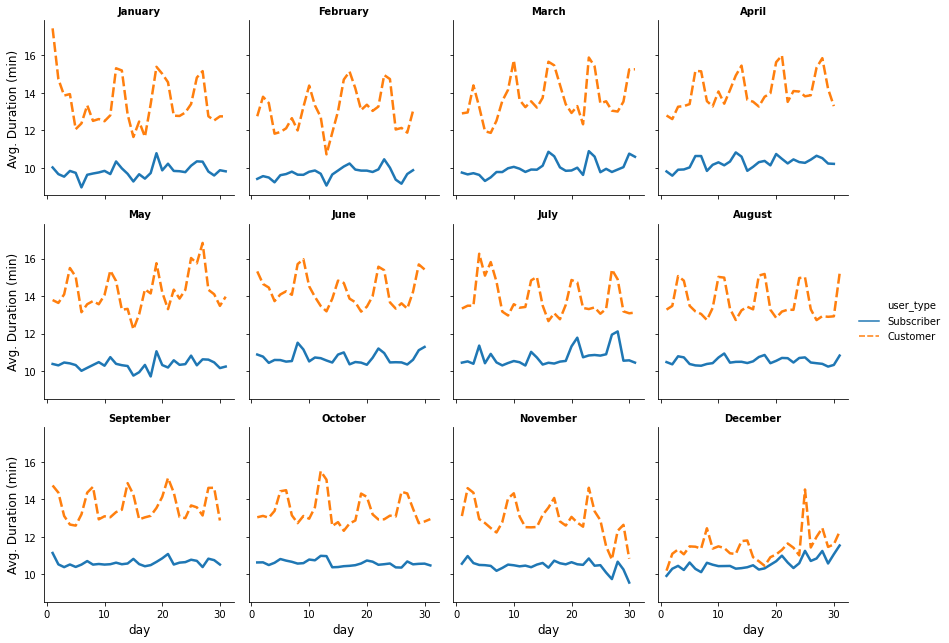

In [74]:
g = sns.relplot(x = 'day', y = "duration_min", hue = "user_type", style = "user_type",
            col = "month", col_wrap = 4, ci = None, data = most_trips,
            height = 3, linewidth = 2.5, kind = "line");

g.set_titles('{col_name}', fontweight='bold', fontsize = 'large');

for ax in g.axes.flat:
    ax.set_ylabel('Avg. Duration (min)', fontsize='large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')

> Customers have longer trips in average compared to Subscribers.

> the gap between customer & subscriber trips'duration is less in december.

> In the beginning of january, customers have the longest trips in average.

## Conclusions

- Most trips' duration range between 3 - 30 minutes, with some outliers over 300 minutes.
- About 80% of users are Subscribers & 20% of users are Customers, but Customers have longer trips in average compared to Subscribers.
- Excluding Outliers, Subscribers tend to have shorter Trips about 10 minutes in average, While Customers have longer trips about 13 minutes in average.
- In Weekend (Sat & Sun) the count of trips is the least compared with other weekdays for Subscribers, No much difference for Customers.
- But the trips duration is longer in average about 28 min for customer & about 13 min for subscriber In Weekend.